In [1]:
#This project creates a model that accurately predicts the likelihood of a new patient having heart disease in the future. 
#The project uses Heart Failure Prediction Dataset, found at: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dir_path = "C:/Users/rishd/Downloads/heart.csv"

heart_df = pd.read_csv(dir_path)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
heart_df.shape

(918, 12)

In [5]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The above cell shows the corresponding statistics for each numerical column. 
The average age is around 53, with a standard deviation of 9 years. The lowest age is 28, with the median being at 54.
Looking at the Cholesterol column, a max of 600 is quite high, and may need further investigation. 
Same thing when looking at Max Heart Rate column, with the max value being at 202. Again, this is quite high and needs investigation. 
Overall, the dataset is clean, and contents no missing values. 

In [7]:
heart_df.isna().sum()
#Zero na values 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
cat_heart_df = heart_df.select_dtypes(include = ['object'])
cat_heart_df['FastingBS'] = heart_df['FastingBS']
cat_heart_df['HeartDisease'] = heart_df['HeartDisease']

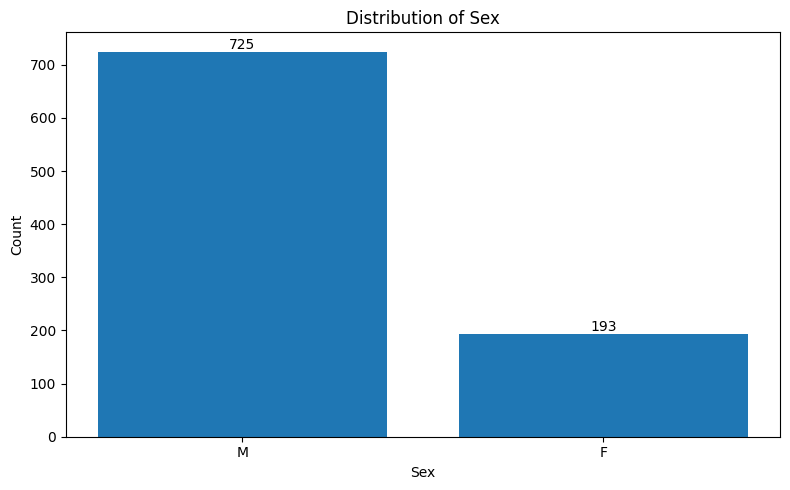

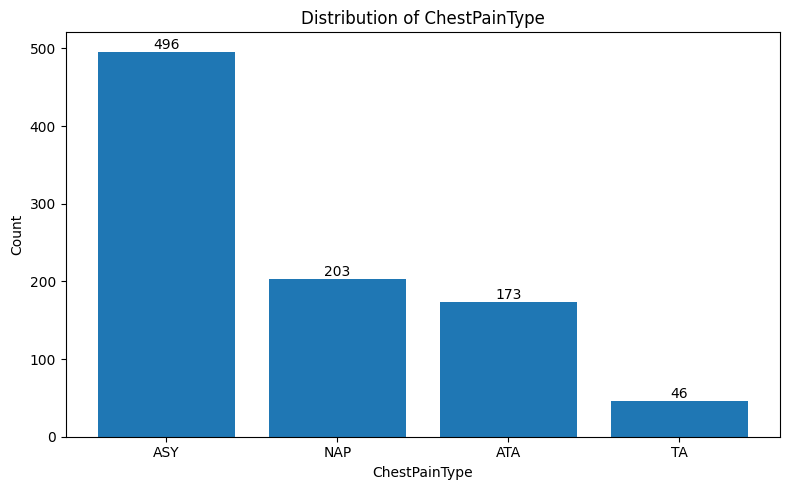

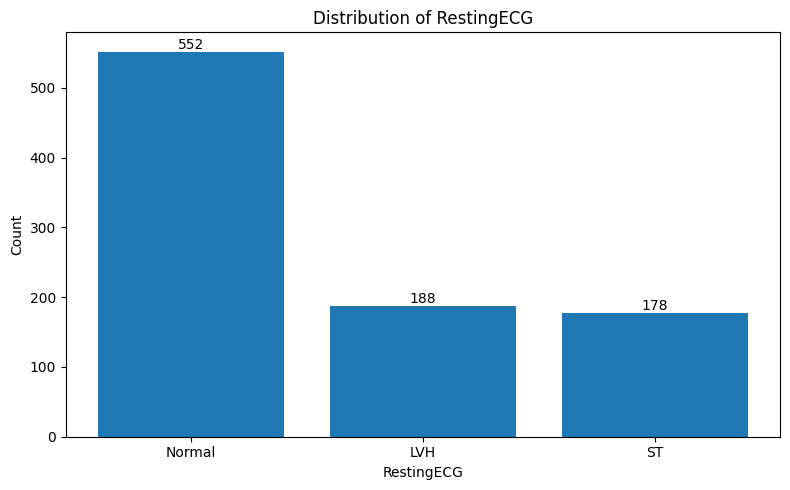

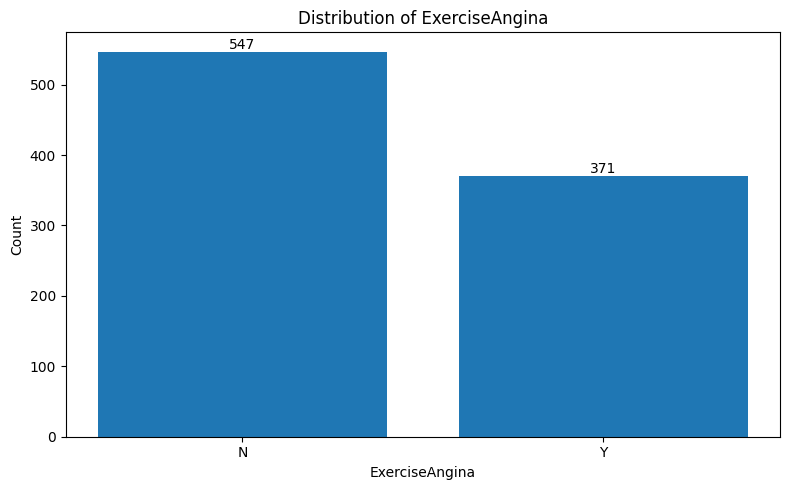

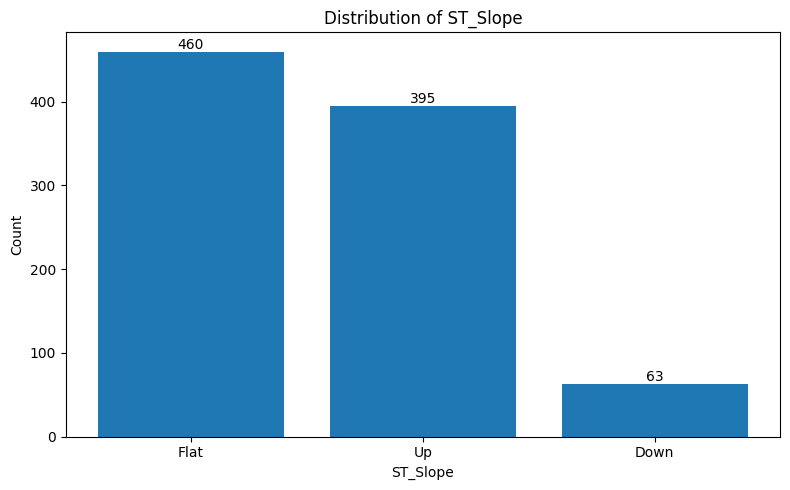

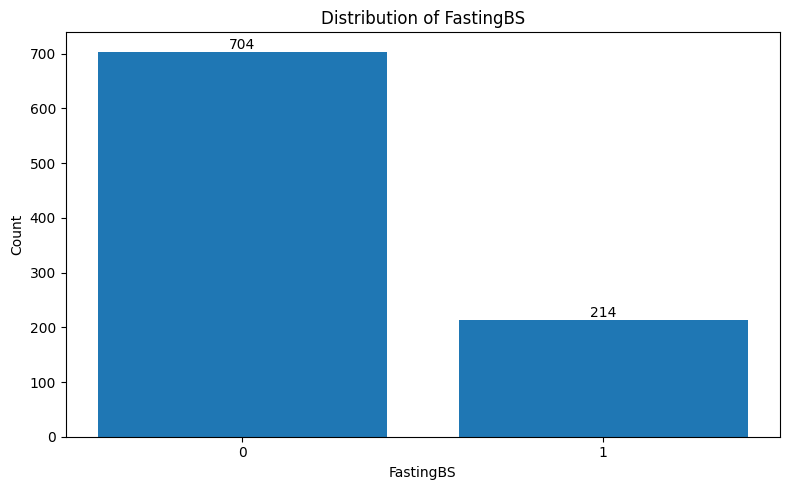

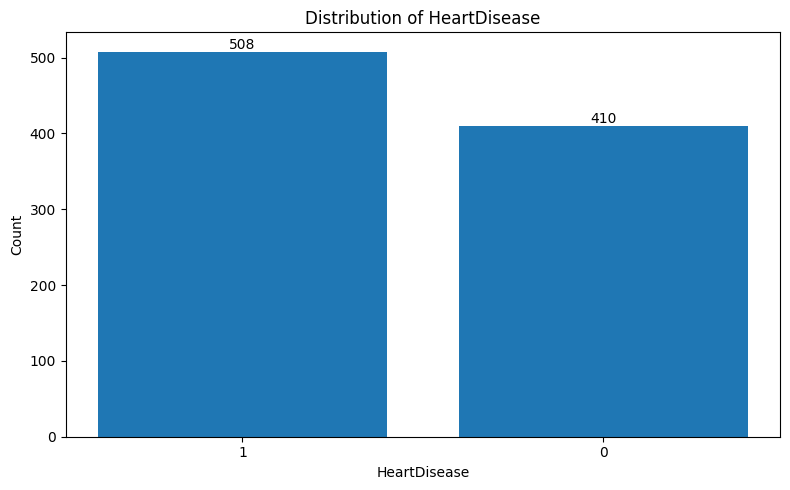

In [10]:
for column in cat_heart_df.columns:
    value_counts = cat_heart_df[column].value_counts()
    plt.figure(figsize = (8,5))
    bars = plt.bar(value_counts.index.astype(str), value_counts.values)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha = 'center', va = 'bottom')

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

In [11]:
cat_heart_df.groupby(['FastingBS', 'HeartDisease']).size().unstack(fill_value = 0)

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


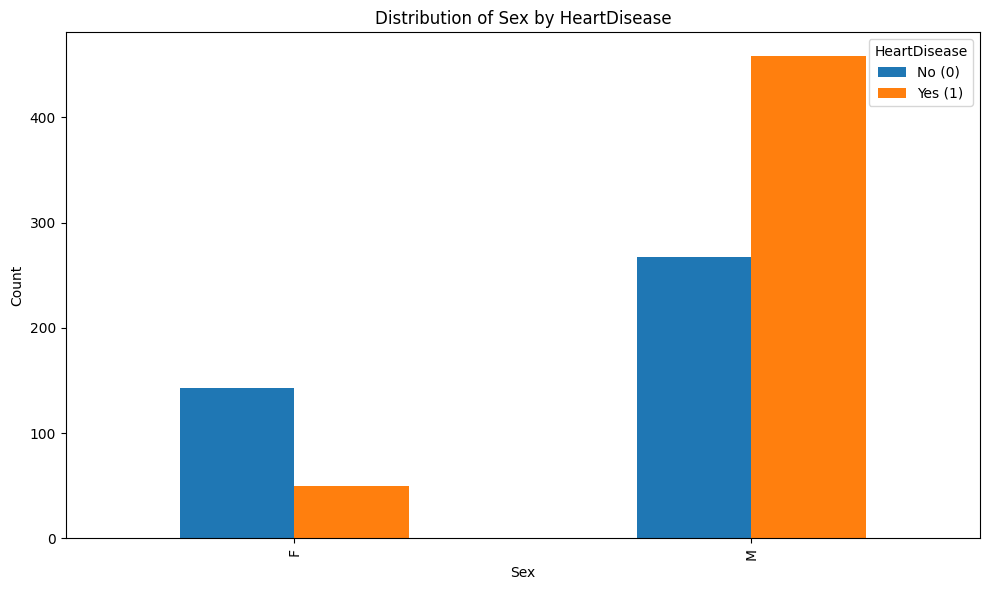

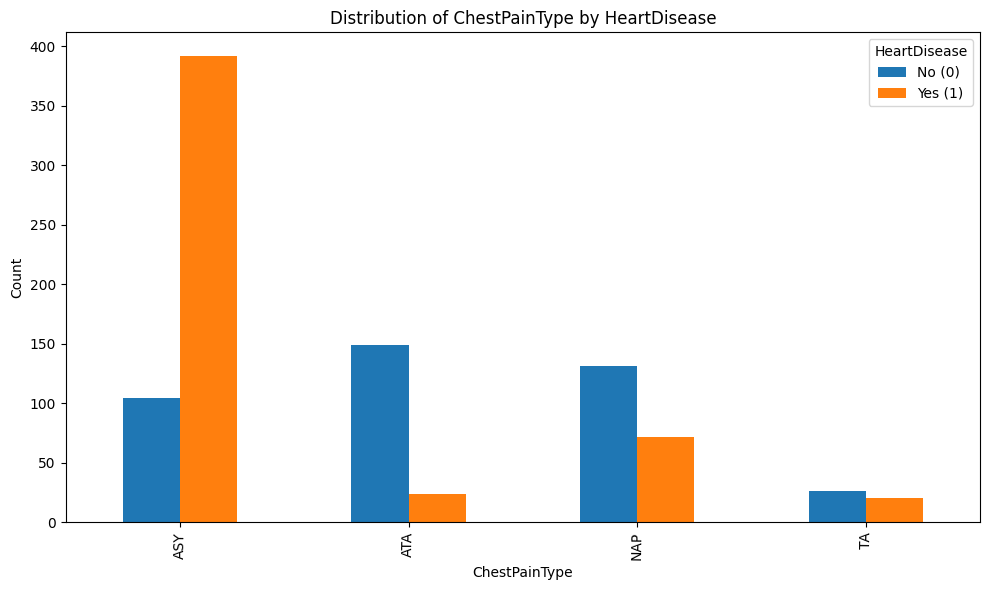

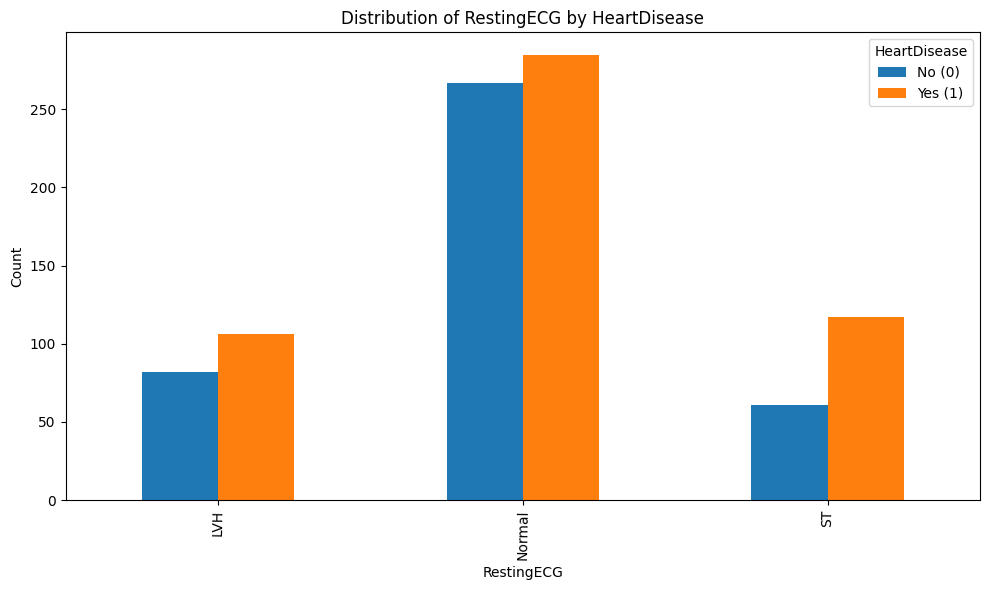

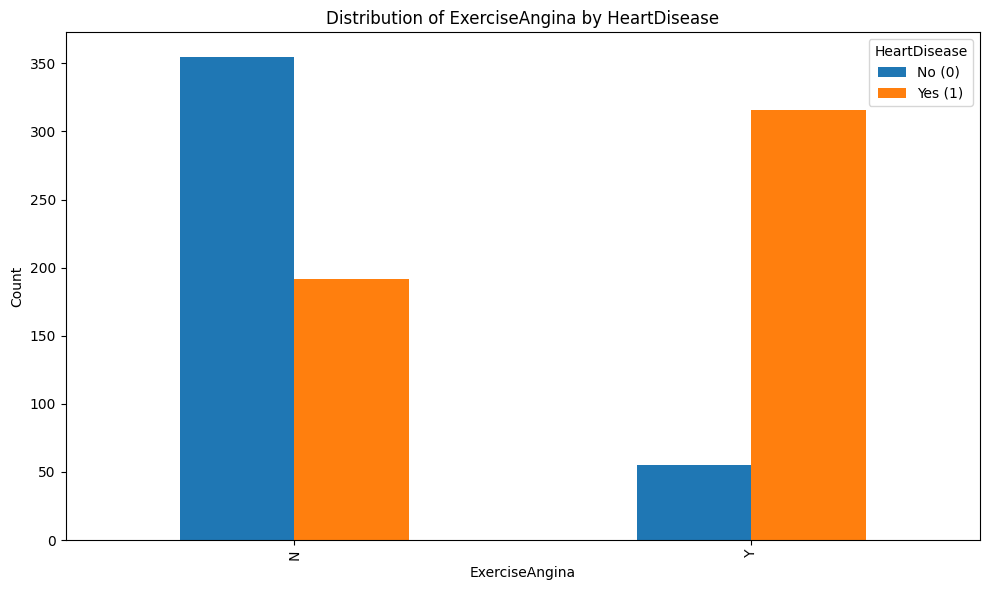

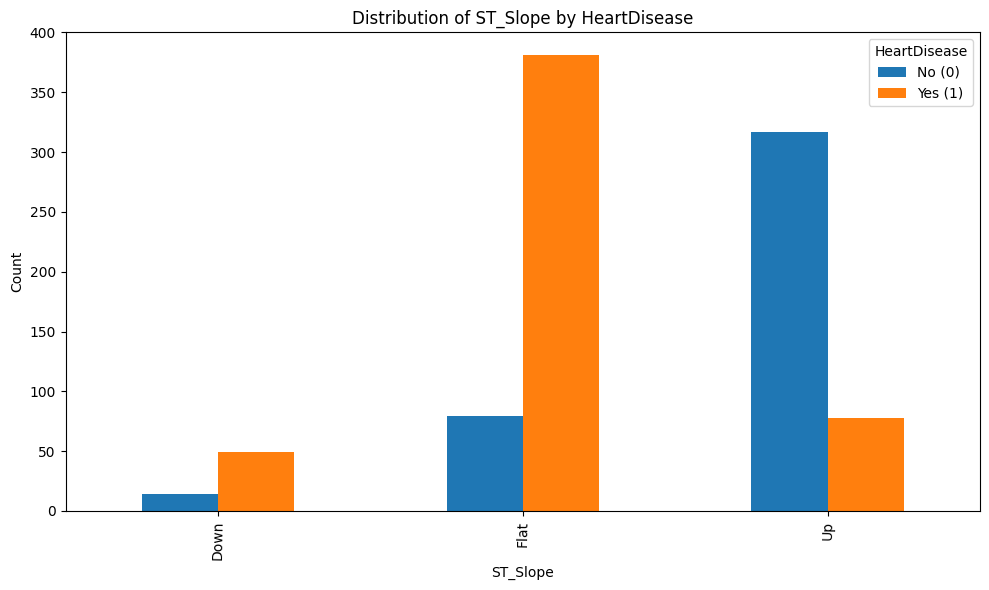

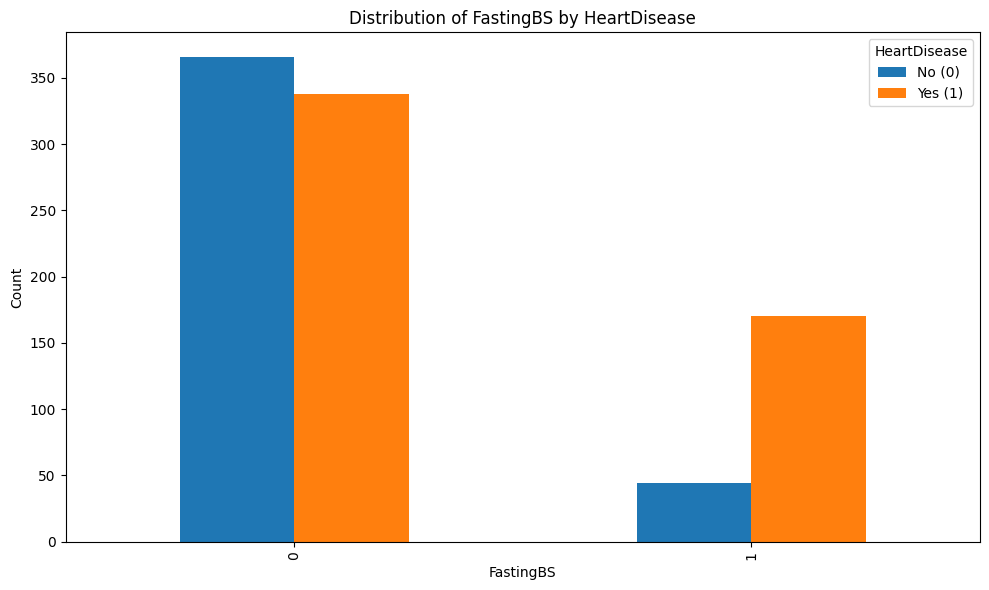

In [12]:
cat_cols = [col for col in cat_heart_df.columns if col != 'HeartDisease']

for column in cat_cols:
    group_counts = cat_heart_df.groupby([column, 'HeartDisease']).size().unstack()
    ax = group_counts.plot(kind = 'bar', figsize = (10,6))
        
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} by HeartDisease')
    plt.legend(title='HeartDisease', labels=['No (0)', 'Yes (1)'])
    plt.xticks(rotation = 89)
    plt.tight_layout()
    plt.show()

In [13]:
cat_heart_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,M,ATA,Normal,N,Up,0,0
1,F,NAP,Normal,N,Flat,0,1
2,M,ATA,ST,N,Up,0,0
3,F,ASY,Normal,Y,Flat,0,1
4,M,NAP,Normal,N,Up,0,0
...,...,...,...,...,...,...,...
913,M,TA,Normal,N,Flat,0,1
914,M,ASY,Normal,N,Flat,1,1
915,M,ASY,Normal,Y,Flat,0,1
916,F,ATA,LVH,N,Flat,0,1


In [14]:
disease_df = heart_df[(heart_df['HeartDisease'] == 1)]
total_num = disease_df.count()
num_df = disease_df[(disease_df['Age'] > 50) & (disease_df['Sex'] == 'M')]
counts = num_df.count()

percent = (counts / total_num)[0]

print(percent * 100)


67.71653543307087


C:\Users\rishd\AppData\Local\Temp\ipykernel_7520\2513777310.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent = (counts / total_num)[0]


67% of patients with heart disease are male and over 50 years old

In [15]:
disease_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [16]:
disease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


The median age of patients who were diagnosed with heart disease is 57

In [17]:
#Data Cleaning
Resting_BP_ZC = len(heart_df[heart_df['RestingBP'] == 0])
Cholesterol_ZC = len(heart_df[heart_df['Cholesterol'] == 0])
print(Resting_BP_ZC)
print(Cholesterol_ZC)

1
172


In [18]:
Resting_BP_ZC_index = heart_df[heart_df['RestingBP'] == 0].index[0]
heart_df.drop(Resting_BP_ZC_index, axis = 0, inplace = True)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [19]:
Chol_median = heart_df[heart_df['Cholesterol'] > 0].groupby('HeartDisease')['Cholesterol'].median()

Chol_median

HeartDisease
0    231.5
1    246.0
Name: Cholesterol, dtype: float64

In [20]:
heart_df.loc[heart_df['Cholesterol'] == 0, 'Cholesterol'] = (heart_df.loc[heart_df['Cholesterol'] == 0, 'HeartDisease'].map(Chol_median))

C:\Users\rishd\AppData\Local\Temp\ipykernel_7520\3390970560.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[246.  246.  246.  246.  246.  246.  246.  246.  231.5 246.  246.  246.
 246.  246.  231.5 246.  246.  231.5 246.  246.  246.  231.5 246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  231.5 246.  246.
 246.  246.  246.  231.5 246.  246.  246.  231.5 246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  231.5
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  231.5 231.5 246.  246.  246.  246.  246.  231.5 231.5
 246.  246.

In [21]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [22]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [23]:
heart_df_dummies = pd.get_dummies(data = heart_df, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first = True)
heart_df_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [25]:
y_cols = heart_df_dummies.pop('HeartDisease')
heart_df_dummies['HeartDisease'] = y_cols

In [26]:
heart_df_dummies

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,True,True,False,False,True,False,False,False,True,0
1,49,160,180.0,0,156,1.0,False,False,True,False,True,False,False,True,False,1
2,37,130,283.0,0,98,0.0,True,True,False,False,False,True,False,False,True,0
3,48,138,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False,1
4,54,150,195.0,0,122,0.0,True,False,True,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,True,False,False,True,True,False,False,True,False,1
914,68,144,193.0,1,141,3.4,True,False,False,False,True,False,False,True,False,1
915,57,130,131.0,0,115,1.2,True,False,False,False,True,False,True,True,False,1
916,57,130,236.0,0,174,0.0,False,True,False,False,False,False,False,True,False,1


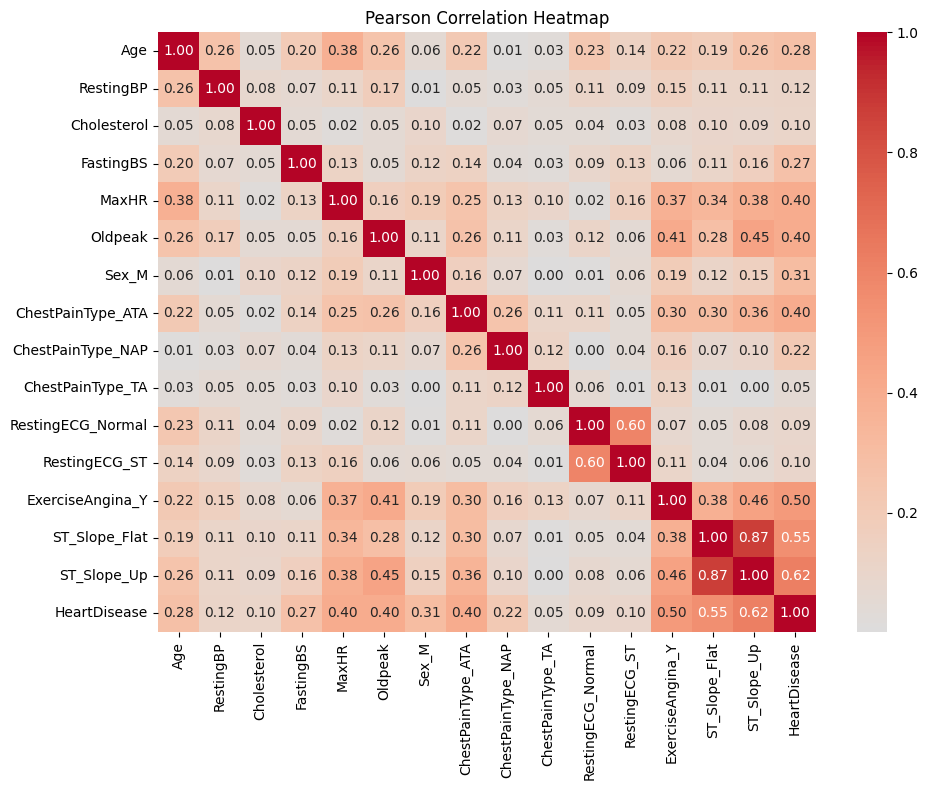

In [28]:
import seaborn as sns
corr_matrix = abs(heart_df_dummies.corr())
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f')
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

The heatmap suggests ST_Slope_Up, ST_Slope_Flat, ExerciseAngina_Y, ChestPainType_ATA, Oldpeak, MaxHR are all correlating with the target column, HeartDisease. 

Lets verify with r^2

In [30]:
corr_squared_matrix = corr_matrix**2
corr_squared_matrix.sort_values(by = 'HeartDisease', ascending = False, inplace = True)
corr_squared_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
HeartDisease,0.079531,0.013922,0.010775,0.071821,0.161130,0.162924,0.093097,0.161346,0.046359,0.002980,0.008547,0.010623,0.245510,0.306584,0.386688,1.000000
ST_Slope_Up,0.066578,0.011230,0.008864,0.026356,0.147717,0.202769,0.022661,0.127680,0.009136,0.000003,0.006304,0.003532,0.208679,0.758357,1.000000,0.386688
ST_Slope_Flat,0.034410,0.012138,0.009654,0.011596,0.118089,0.080018,0.013362,0.092627,0.005514,0.000105,0.002314,0.001899,0.147059,1.000000,0.758357,0.306584
ExerciseAngina_Y,0.046664,0.023429,0.006437,0.003599,0.136917,0.167685,0.036567,0.090569,0.027133,0.016477,0.005219,0.011374,1.000000,0.147059,0.208679,0.245510
Oldpeak,0.066855,0.030364,0.002898,0.002816,0.025989,1.000000,0.011119,0.068593,0.011581,0.001049,0.013758,0.003168,0.167685,0.080018,0.202769,0.162924
ChestPainType_ATA,0.047573,0.002639,0.000298,0.019837,0.064625,0.068593,0.026016,1.000000,0.065693,0.012280,0.011755,0.002151,0.090569,0.092627,0.127680,0.161346
MaxHR,0.146138,0.012033,0.000345,0.017179,1.000000,0.025989,0.035974,0.064625,0.017798,0.010047,0.000537,0.024826,0.136917,0.118089,0.147717,0.161130
Sex_M,0.003099,0.000089,0.010459,0.014502,0.035974,0.011119,1.000000,0.026016,0.004581,0.000015,0.000123,0.004097,0.036567,0.013362,0.022661,0.093097
Age,1.000000,0.069213,0.002697,0.039271,0.146138,0.066855,0.003099,0.047573,0.000136,0.001029,0.053265,0.018742,0.046664,0.034410,0.066578,0.079531
FastingBS,0.039271,0.004600,0.002381,1.000000,0.017179,0.002816,0.014502,0.019837,0.001459,0.000716,0.008572,0.016092,0.003599,0.011596,0.026356,0.071821


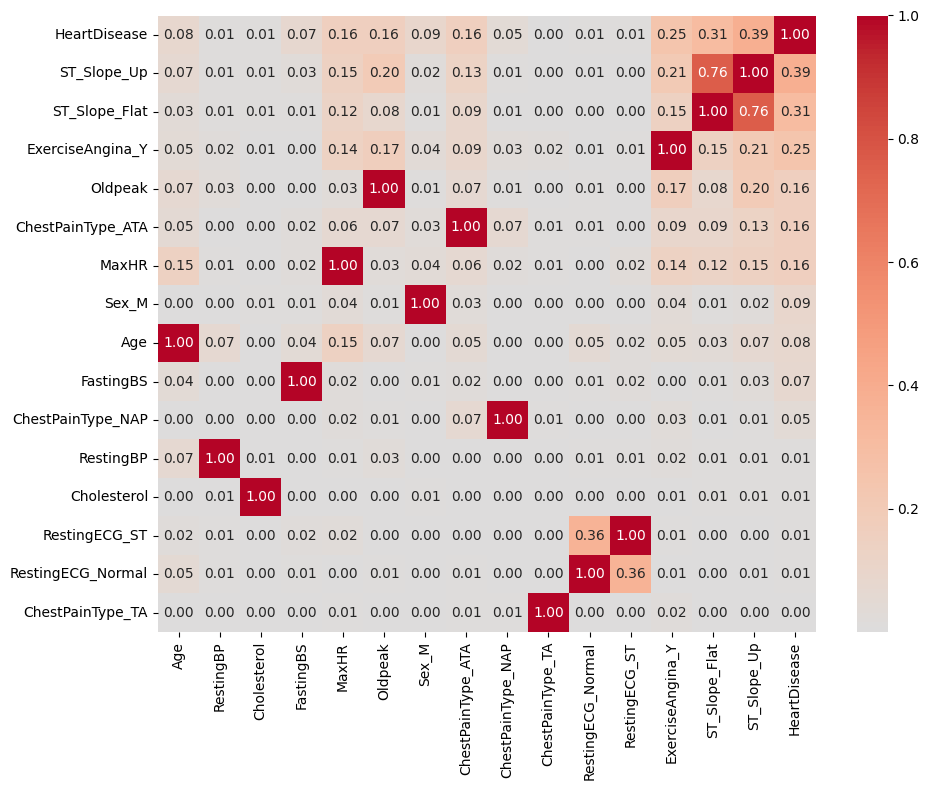

In [36]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_squared_matrix, annot = True, center = 0, fmt = '.2f', cmap = 'coolwarm')
plt.tight_layout()

Yes, those features are the ones with the highest r^2

In [40]:
top_5_features = corr_squared_matrix['HeartDisease'].iloc[1:5].index.to_list()
top_5_features.append('Sex_M')
top_5_features

['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'Sex_M']

Lets take the top 4 features, and lets also add Sex_M. Sex_M has a low coefficient, but due to our EDA, lets also take it

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

X = heart_df_dummies.iloc[:,:-1]
y = heart_df_dummies.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y,  test_size = 0.2, random_state = 28)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2 / 0.8, random_state = 28)

In [57]:
for feature in top_5_features:
    knn = KNC(n_neighbors = 7)
    knn.fit(X_train[[feature]], y_train)
    model_score = knn.score(X_val[[feature]], y_val)
    percent_accuracy = model_score * 100
    print(f'Feature: {feature: <18} Accuracy: {percent_accuracy:>6.3f}%')

Feature: ST_Slope_Up        Accuracy: 82.065%
Feature: ST_Slope_Flat      Accuracy: 77.717%
Feature: ExerciseAngina_Y   Accuracy: 76.630%
Feature: Oldpeak            Accuracy: 61.957%
Feature: Sex_M              Accuracy: 67.391%


The best feature was ST_Slope_UP

In [78]:
from sklearn.preprocessing import MinMaxScaler

MMScaler = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = MMScaler.fit_transform(X_train[list(top_5_features)])
X_val_scaled = MMScaler.transform(X_val[list(top_5_features)])
X_test_scaled = MMScaler.transform(X_test[list(top_5_features)])

KNN_5 = KNC(n_neighbors = 9)
KNN_5.fit(X_train_scaled, y_train)
model_score_scaled = KNN_5.score(X_val_scaled, y_val)
perc_model_score_scaled = model_score_scaled * 100
perc_model_score_scaled 

84.23913043478261

This model actully performed better than our best single feature model, but not by a lot 

In [81]:
from sklearn.model_selection import GridSearchCV

param_dict = {
    'n_neighbors': [5,7,9,11,13,15,17],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1,2],
    'leaf_size': [30, 50]
}

KNN_model = KNC()
grid_search = GridSearchCV(
    estimator = KNN_model,
    param_grid = param_dict,
    scoring = 'accuracy',
    cv = 5,
    n_jobs = -1
)

top_5_features = list(top_5_features)

grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.8415846538782319


The accuracy got a little worse than the previous model as CV is more reliable due to the 5 fold cross-validation. 
The other model could be a lucky split, resulting in 84% accuracy.
However, the numbers are not too different. 

In [82]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [83]:
test_score = best_knn.score(X_test_scaled, y_test)
print(f'{test_score * 100: 0.2f}')

 84.24


In [100]:
#Testing Ensemble

from sklearn.ensemble import VotingClassifier

knn1 = grid_search.best_estimator_
knn2 = KNC(n_neighbors = 9, weights = 'distance', metric = 'euclidean')
knn3 = KNC(n_neighbors = 7, weights = 'uniform', metric = 'manhattan')

ensemble = VotingClassifier([
    ('best_knn', knn1),
    ('knn9_dist', knn2),
    ('knn7_manh', knn3)
], voting = 'hard', n_jobs = -1)

In [101]:
ensemble

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('best_knn', ...), ('knn9_dist', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'hard'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",-1
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",15
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1


In [102]:
ensemble.fit(X_train_scaled, y_train)

ensemble_score = ensemble.score(X_test_scaled, y_test)
print(f'Test Accuracy of Ensemble: {ensemble_score * 100 : 0.2f}%')

Test Accuracy of Ensemble:  84.24%
